# Homework 7 - Let's have another look at the Titanic

The objective of this homework is to practice k-means clustering. To successfully complete this homework, you may use any resources available to you. 

Last week, we used supervised classification to understand what drives survivability. This week we explore whether the machine can figure it out on it's own.

Get the `titanic3.csv` data (Source: [Link](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt)).

1. Analyze the data using pandas.
    * Create a column `child` that specifies whether the person is a child (age <= 10).
    * Create a column `family_size` that specifies the size of the family of that person (Please note that there are two relevant columns for this step.
2. Develop clusters for the dataset.
    * Impute the `age` column with the **median** (Please note that this a very simplified step. Imputing is usually way more complex).
    * Drop all remaining NaN values.
    * Preprocess the `sex` column using LabelEncoder.
    * Preprocess the `child` column using LabelEncoder (not actually necessary but for systematic purposes).
    * Scale the data set to standardize the dataset using `sklearn.preprocessing.scale`
    * Run a KMeans cluster analysis. Pick an appropriate number of clusters.
    * Interpret the results.
3. Implement a search for the best number of clusters using the silhouette score from `sklearn.metrics`.
    * Set the parameters to 2,3,4,5,6 clusters.
    * Interpret the best results.
    * Try to find names for the clusters.
    
Hints:
* Explain what you are doing.
* Use references.

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns

In [166]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm

In [167]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt

In [281]:
raw = pd.read_csv("https://raw.githubusercontent.com/mschermann/msis2802winter2018homework/master/\
titanic3.csv")

In [282]:
tc = raw.copy()

## Description of the dataset

Each row is a passenger on the Titanic. The columns report attributes for the passengers:

| Column | Description | Relevant for this homework|
|--------|-------------|--------|
|`survived`|1 = survived, 0 = died | **X**|
|`pclass`| 1 = first class, 2 = second class, 3 = third class |**X**|
|`name`| Name of the passenger| |
|`sex`| male or female|**X**|
|`age`| age in years|**X**|
|`sibsp`| The number of siblings or spouses that are also traveling on the Titanic| **X**|
|`parch`| The number of parents or childen that are also traveling on the Titanic| **X**|
|`ticket`|The ticket number| |
|`fare`| The ticket price | |
|`cabin`| The cabin number | |
|`embarked`| The starting city | |
|`boat`| The emergency boat number | |
|`body`| The identification number of the body | |
|`home.dest`| The destination of the passenger | |

1. Analyze the data using pandas.
    * Create a column `child` that specifies whether the person is a child (age <= 10).
    * Create a column `family_size` that specifies the size of the family of that person (Please note that there are two relevant columns for this step.

In [283]:
tc['child'] = np.where(tc['age'] <= 10, '1', '0')
tc['family_size'] = tc['sibsp'] + tc['parch'] + 1
tc.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,child,family_size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,4.0


2. Develop clusters for the dataset.
    * Impute the `age` column with the **median** (Please note that this a very simplified step. Imputing is usually way more complex).
    * Drop all remaining NaN values.
    * Preprocess the `sex` column using LabelEncoder.
    * Preprocess the `child` column using LabelEncoder (not actually necessary but for systematic purposes).
    * Scale the data set to standardize the dataset using `sklearn.preprocessing.scale`
    * Run a KMeans cluster analysis. Pick an appropriate number of clusters.
    * Interpret the results.

In [284]:
# Impute age NaN values with median number
tc['age'].fillna((tc['age'].median()), inplace=True)

# Drop columns with too many NaN and also of no use in this case
tc = tc.drop(['cabin', 'boat','body','home.dest'], axis=1)

# Drop all remaining NaN values
tc1 = tc.dropna()
tc1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,child,family_size
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,1,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,0,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,4.0


In [ ]:
# Preprocess the sex and child column
le = pp.LabelEncoder()
tc1['sex'] = le.fit_transform(tc1['sex'].astype(str))
tc1['child'] = le.fit_transform(tc1['child'].astype(str))

In [334]:
# Drop columns not related to X
X = tc1.drop(['name', 'ticket','fare','embarked'], axis=1)

In [290]:
# Scale data set with preprocessing.scale
data = sk.preprocessing.scale(X, axis=1, with_mean=True, with_std=True, copy=True)


In [291]:
# Run a KMeans cluster analysis. Pick an appropriate number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # Start with cluster of 2
y_kmeans = kmeans.fit_predict(data) 

In [292]:
# Check how is this cluster number
from sklearn.metrics import silhouette_score
s2=silhouette_score(X, y_kmeans)
s2

0.50989634934754069

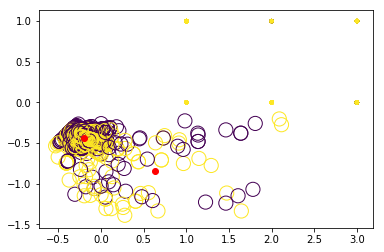

In [293]:
orig = plt.scatter(data[:,0], data[:,1], c=y, s=200)
orig.set_facecolor('None') # Set color to None
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=10, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='red');

In [259]:
# Interpret:
# There are more dead people in my data set shown as the two red spots in the graph, the left one with more circle around are the one represnets death and the other one represents survived people

3. Implement a search for the best number of clusters using the silhouette score from `sklearn.metrics`.
    * Set the parameters to 2,3,4,5,6 clusters.
    * Interpret the best results.
    * Try to find names for the clusters.

In [294]:
# Cluster of 3
kmeans = KMeans(n_clusters=3) 
y_kmeans3 = kmeans.fit_predict(data) 
s3=silhouette_score(X, y_kmeans3)
s3

0.38123322723008768

In [295]:
# Cluster of 4
kmeans = KMeans(n_clusters=4) 
y_kmeans4 = kmeans.fit_predict(data)
s4=silhouette_score(X, y_kmeans4)
s4

0.37046471249050905

In [296]:
# Cluster of 5
kmeans = KMeans(n_clusters=5) 
y_kmeans5 = kmeans.fit_predict(data)
s5=silhouette_score(X, y_kmeans5)
s5

0.32547358971940599

In [297]:
# Cluster of 6
kmeans = KMeans(n_clusters=6) 
y_kmeans6 = kmeans.fit_predict(data)
s6=silhouette_score(X, y_kmeans6)
s6

0.13360611966941049

In [335]:
X

,pclass,survived,sex,age,sibsp,parch,child,family_size
0,1.0,1.0,0,29.0000,0.0,0.0,0,1.0
1,1.0,1.0,1,0.9167,1.0,2.0,1,4.0
2,1.0,0.0,0,2.0000,1.0,2.0,1,4.0
3,1.0,0.0,1,30.0000,1.0,2.0,0,4.0
4,1.0,0.0,0,25.0000,1.0,2.0,0,4.0
5,1.0,1.0,1,48.0000,0.0,0.0,0,1.0
6,1.0,1.0,0,63.0000,1.0,0.0,0,2.0
7,1.0,0.0,1,39.0000,0.0,0.0,0,1.0
8,1.0,1.0,0,53.0000,2.0,0.0,0,3.0
9,1.0,0.0,1,71.0000,0.0,0.0,0,1.0


In [332]:
X.groupby('survived').median() # run the code and hit with ALT+CTL

,pclass,sex,age,sibsp,parch,child,family_size
survived,,,,,,,
0.0,3.0,1,28.0,0.0,0.0,0,1.0
1.0,2.0,0,28.0,0.0,0.0,0,2.0


In [324]:
total=pd.pivot_table(X, 'survived', ['pclass', 'sex', 'age', 'sibsp', 'parch', 'child',
       'family_size'])

In [336]:
total

survived
pclass sex age  sibsp parch child family_size          
1.0    0   2.0  1.0   2.0   1     4.0          0.000000
           14.0 1.0   2.0   0     4.0          1.000000
           15.0 0.0   1.0   0     2.0          1.000000
           16.0 0.0   0.0   0     1.0          1.000000
                      1.0   0     2.0          1.000000
           17.0 1.0   0.0   0     2.0          1.000000
           18.0 0.0   2.0   0     3.0          1.000000
                1.0   0.0   0     2.0          1.000000
                2.0   2.0   0     5.0          1.000000
           19.0 0.0   0.0   0     1.0          1.000000
                      2.0   0     3.0          1.000000
                1.0   0.0   0     2.0          1.000000
           21.0 0.0   0.0   0     1.0          1.000000
                2.0   2.0   0     5.0          1.000000
           22.0 0.0   0.0   0     1.0          1.000000
                      1.0   0     2.0          1.000000
                      2.0   0     3.0          1.000000
                1.0   0.0   0     2.0          1.000000
           23.0 0.0   1.0   0     2.0          1.000000
                1.0   0.0   0     2.0          1.000000
                3.0   2.0   0     6.0          1.000000
           24.0 0.0   0.0   0     1.0          1.000000
                3.0   2.0   0     6.0          1.000000
           25.0 1.0   0.0   0     2.0          1.000000
                      2.0   0     4.0          0.000000
           26.0 0.0   0.0   0     1.0          1.000000
                1.0   0.0   0     2.0          1.000000
           27.0 1.0   1.0   0     3.0          1.000000
                      2.0   0     4.0          1.000000
           28.0 0.0   0.0   0     1.0          1.000000
...                                                 ...
3.0    1   39.0 0.0   2.0   0     3.0          0.000000
                1.0   5.0   0     7.0          0.000000
           40.0 0.0   0.0   0     1.0          0.000000
                1.0   1.0   0     3.0          0.000000
                      4.0   0     6.0          0.000000
                      5.0   0     7.0          0.000000
                      6.0   0     8.0          0.000000
           40.5 0.0   0.0   0     1.0          0.000000
                      2.0   0     3.0          0.000000
           41.0 0.0   0.0   0     1.0          0.000000
                2.0   0.0   0     3.0          0.000000
           42.0 0.0   0.0   0     1.0          0.000000
                      1.0   0     2.0          0.000000
           43.0 0.0   0.0   0     1.0          0.000000
           44.0 0.0   0.0   0     1.0          0.333333
                      1.0   0     2.0          0.000000
           45.0 0.0   0.0   0     1.0          0.500000
           45.5 0.0   0.0   0     1.0          0.000000
           47.0 0.0   0.0   0     1.0          0.000000
           48.0 0.0   0.0   0     1.0          0.000000
           49.0 0.0   0.0   0     1.0          0.000000
           50.0 0.0   0.0   0     1.0          0.000000
                1.0   0.0   0     2.0          0.000000
           51.0 0.0   0.0   0     1.0          0.000000
           55.5 0.0   0.0   0     1.0          0.000000
           59.0 0.0   0.0   0     1.0          0.000000
           61.0 0.0   0.0   0     1.0          0.000000
           65.0 0.0   0.0   0     1.0          0.000000
           70.5 0.0   0.0   0     1.0          0.000000
           74.0 0.0   0.0   0     1.0          0.000000

[629 rows x 1 columns]